In [1]:
# 1 Si richiede di verificare le dimensioni del dataset e i relativi metadati
import pandas as pd
import numpy as np
# Carica il dataset CSV
df = pd.read_csv('owid-covid-data.csv')


In [2]:
# Dimensioni del dataset
dimensioni = df.shape
print("Dimensioni del dataset:", dimensioni)

Dimensioni del dataset: (387330, 67)


In [3]:
# Informazioni sulle colonne
informazioni_colonne = df.info()
print("\nInformazioni sulle colonne:\n", informazioni_colonne)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387330 entries, 0 to 387329
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    387330 non-null  object 
 1   continent                                   368774 non-null  object 
 2   location                                    387330 non-null  object 
 3   date                                        387330 non-null  object 
 4   total_cases                                 348333 non-null  float64
 5   new_cases                                   376280 non-null  float64
 6   new_cases_smoothed                          375050 non-null  float64
 7   total_deaths                                326109 non-null  float64
 8   new_deaths                                  376589 non-null  float64
 9   new_deaths_smoothed                         375359 non-null  float64
 

In [4]:
# Statistiche descrittive del dataset
statistiche_descrittive = df.describe()
print("\nStatistiche descrittive:\n", statistiche_descrittive)


Statistiche descrittive:
         total_cases     new_cases  new_cases_smoothed  total_deaths  \
count  3.483330e+05  3.762800e+05        3.750500e+05  3.261090e+05   
mean   7.386532e+06  8.728781e+03        8.756916e+03  8.996469e+04   
std    4.398509e+07  2.397048e+05        9.038526e+04  4.566992e+05   
min    1.000000e+00  0.000000e+00        0.000000e+00  1.000000e+00   
25%    9.448000e+03  0.000000e+00        0.000000e+00  1.360000e+02   
50%    7.971300e+04  0.000000e+00        1.700000e+01  1.393000e+03   
75%    8.516680e+05  0.000000e+00        4.024290e+02  1.257300e+04   
max    7.749544e+08  4.423623e+07        6.319461e+06  7.040264e+06   

          new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  376589.000000        375359.000000            348333.000000   
mean       78.157939            78.405166            112347.967657   
std      1424.517554           534.387547            160036.519608   
min         0.000000             0.000000            

In [5]:
# Prime righe del dataset
prime_righe = df.head(10)
print("\nPrime righe del dataset:\n", prime_righe)


Prime righe del dataset:
   iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-05          NaN        0.0   
1      AFG      Asia  Afghanistan  2020-01-06          NaN        0.0   
2      AFG      Asia  Afghanistan  2020-01-07          NaN        0.0   
3      AFG      Asia  Afghanistan  2020-01-08          NaN        0.0   
4      AFG      Asia  Afghanistan  2020-01-09          NaN        0.0   
5      AFG      Asia  Afghanistan  2020-01-10          NaN        0.0   
6      AFG      Asia  Afghanistan  2020-01-11          NaN        0.0   
7      AFG      Asia  Afghanistan  2020-01-12          NaN        0.0   
8      AFG      Asia  Afghanistan  2020-01-13          NaN        0.0   
9      AFG      Asia  Afghanistan  2020-01-14          NaN        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         0.0                  NaN  ...   
1              

In [6]:
# 2 Si chiede poi per ogni continente di trovare il numero di casi totali avvenuti in quello stesso continente; 
#si chiede di non considerare eventuali locazioni che nel dataset non appartengono ad alcun continente; 

# Rimuovi le righe con valori mancanti nella colonna 'continent'
dfcontinenti = df.dropna(subset=['continent'])

# Calcola il numero totale di casi per continente
casi_per_continente = dfcontinenti.groupby('continent')['total_cases'].sum()
somma_continenti= casi_per_continente.sum()
somma_continenti = "{:,.0f}".format(somma_continenti)
print("La somma e': ",somma_continenti)
casi_per_continente = casi_per_continente.apply(lambda x: '{:,.0f}'.format(x))
print("\nNumero totale di casi per continente:")
print(casi_per_continente)


La somma e':  607,144,645,410

Numero totale di casi per continente:
continent
Africa            12,776,779,335
Asia             209,966,253,167
Europe           201,388,821,111
North America    109,662,596,619
Oceania            9,506,027,179
South America     63,844,167,999
Name: total_cases, dtype: object


In [7]:
#Sempre riguardo i casi totali, si chiede di scrivere del codice che, date due variabili contenenti i nomi di continenti, 
#ne confronti i seguenti relativi descrittori statistici: valore massimo, 
#media, e percentuale rispetto al numero dei casi totali nel mondo (calcolati anche sulle locazioni senza indicazione di continente);

In [8]:
# Calcola il numero totale di casi nel mondo (includendo le locazioni senza indicazione di continente)europa
casi_totali_mondo = df['total_cases'].sum()


# Seleziona i casi per i due continenti specificati
continente_1 = "Europe"
continente_2 = "South America"

casi_continente_1 = df[df['continent'] == continente_1]['total_cases']
casi_continente_2 = df[df['continent'] == continente_2]['total_cases']

# Somma dei casi dei due continenti

casi_in_europa = df[df['continent'] == continente_1]['total_cases'].sum()
casi_in_southamerica = df[df['continent'] == continente_2]['total_cases'].sum()


# Calcola i descrittori statistici per i due continenti
descrittore_statistico_continente_1 = casi_continente_1.describe()
descrittore_statistico_continente_1=descrittore_statistico_continente_1.apply(lambda x: '{:,.0f}'.format(x))
descrittore_statistico_continente_2 = casi_continente_2.describe()
descrittore_statistico_continente_2=descrittore_statistico_continente_2.apply(lambda x: '{:,.0f}'.format(x))

# Calcola la percentuale rispetto ai casi totali nel mondo
percentuale_continente_1 = (casi_in_europa / casi_totali_mondo) * 100
percentuale_continente_2 = (casi_in_southamerica / casi_totali_mondo) * 100

# Stampa i risultati
casi_totali_mondo = "{:,.0f}".format(casi_totali_mondo)
print("I casi mondiali: ", casi_totali_mondo, "\n")
print("Descrittori statistici per", continente_1)
percentuale_continente_1="{:.2f}%".format(percentuale_continente_1)
print("Percentuale rispetto ai casi totali nel mondo:", percentuale_continente_1)
print(descrittore_statistico_continente_1)


print("\nDescrittori statistici per", continente_2)
percentuale_continente_2="{:.2f}%".format(percentuale_continente_2)
print("Percentuale rispetto ai casi totali nel mondo:", percentuale_continente_2)
print(descrittore_statistico_continente_2)


I casi mondiali:  2,572,972,698,038 

Descrittori statistici per Europe
Percentuale rispetto ai casi totali nel mondo: 7.83%
count        75,448
mean      2,669,240
std       6,402,988
min               1
25%          26,408
50%         343,732
75%       1,879,480
max      38,997,490
Name: total_cases, dtype: object

Descrittori statistici per South America
Percentuale rispetto ai casi totali nel mondo: 2.48%
count        20,538
mean      3,108,587
std       7,185,748
min               1
25%          66,385
50%         537,842
75%       2,251,027
max      37,519,960
Name: total_cases, dtype: object


In [9]:
#Selezionare i dati relativi all'Italia nel 2022, e mostrare con un grafico adeguato l'evoluzione del casi totali rispetto alla data. 
#Mostrare poi con un grafico adeguato il numero di nuovi casi rispetto alla data (filtrare i dati se necessario). 
#Mostrare infine un grafico che mostra l'andamento della somma cumulativa nuovi casi del 2022, 
#e commentare se ci sono similarità con l'andamento del numero dei casi totali; 

In [10]:
# Controllare le colonne della tabella
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387330 entries, 0 to 387329
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    387330 non-null  object 
 1   continent                                   368774 non-null  object 
 2   location                                    387330 non-null  object 
 3   date                                        387330 non-null  object 
 4   total_cases                                 348333 non-null  float64
 5   new_cases                                   376280 non-null  float64
 6   new_cases_smoothed                          375050 non-null  float64
 7   total_deaths                                326109 non-null  float64
 8   new_deaths                                  376589 non-null  float64
 9   new_deaths_smoothed                         375359 non-null  float64
 

In [11]:
#controllare come sono scritte le Nazione nel DB
df['location'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa',
       'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Asia', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'England', 'Equatorial Guinea', 'Eritrea',

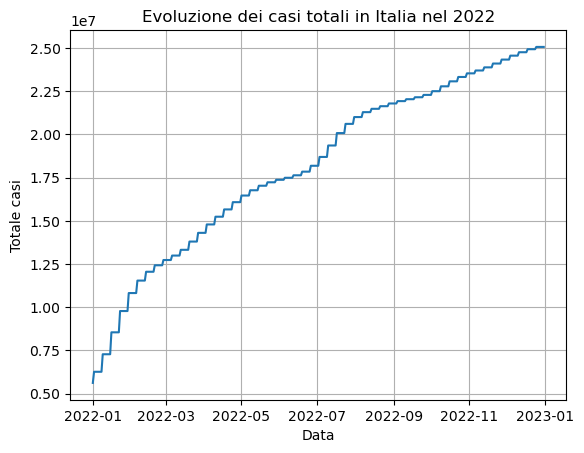

In [12]:
import matplotlib.pyplot as plt
# Trasformare la data da stringa a data
df['date'] = pd.to_datetime(df['date'])
dati_italia_2022 = df[(df['location'] == 'Italy') & (df['date'].dt.year == 2022)]

# Creare un grafico per l'evoluzione dei casi totali
plt.plot(dati_italia_2022['date'], dati_italia_2022['total_cases'])
plt.title("Evoluzione dei casi totali in Italia nel 2022")
plt.xlabel("Data")
plt.ylabel("Totale casi")
plt.grid(True)

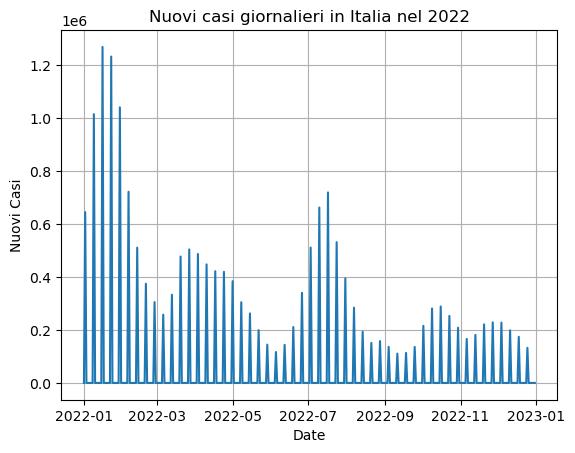

In [13]:
# Creare un grafico per il numero di nuovi casi rispetto alla data
plt.plot(dati_italia_2022['date'], dati_italia_2022['new_cases'])
plt.title("Nuovi casi giornalieri in Italia nel 2022")
plt.xlabel("Date")
plt.ylabel("Nuovi Casi")
plt.grid(True)

In [29]:
# Calcolare la sommacumulativa dei nuovi casi nel 2022
dati_italia_2022.loc[:, 'new_cases_cumulative'] = dati_italia_2022['new_cases'].cumsum()
dati_italia_2022['new_cases_cumulative']

166403           0.0
166404      644604.0
166405      644604.0
166406      644604.0
166407      644604.0
             ...    
166763    19438072.0
166764    19438072.0
166765    19438072.0
166766    19438072.0
166767    19438072.0
Name: new_cases_cumulative, Length: 365, dtype: float64

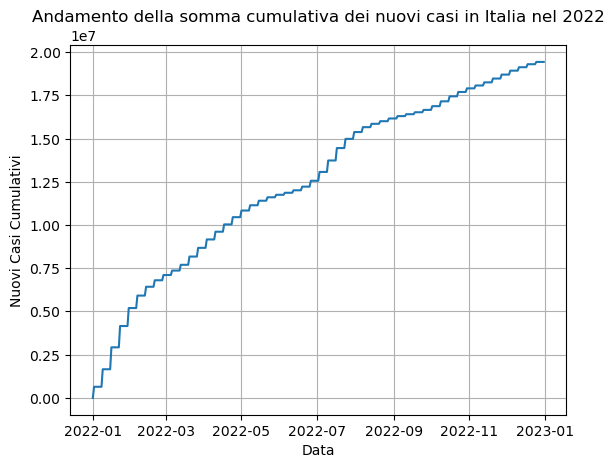

In [15]:
#Creazione del grafico
plt.plot(dati_italia_2022['date'], dati_italia_2022['new_cases_cumulative'])
plt.title("Andamento della somma cumulativa dei nuovi casi in Italia nel 2022")
plt.xlabel("Data")
plt.ylabel("Nuovi Casi Cumulativi")
plt.grid(True)

In [16]:
# Mettendo a confronto i grafici possiamo notare che i casi giornalieri stanno dimunento. 
# Infatti risulta che al 1 gennaio 2023 i casi sono di circa 2*10^7 
# Mentre controllando sul totale sempre al 1 gennaio 2023 i casi sono di circa 2,50*10^7
# Questo risultato si può notare anche vedendo il grafico dei nuovi casi giornaliri
# Pertanto possiamo determinare che la cura sta portando risultati

In [17]:
#Riguardo le nazioni di Italia, Germania e Francia, mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti in 
#terapia intensiva (Intensive Care Unit, ICU) da maggio 2022 (incluso) ad aprile 2023 (incluso), e scrivere un breve commento a riguardo; 

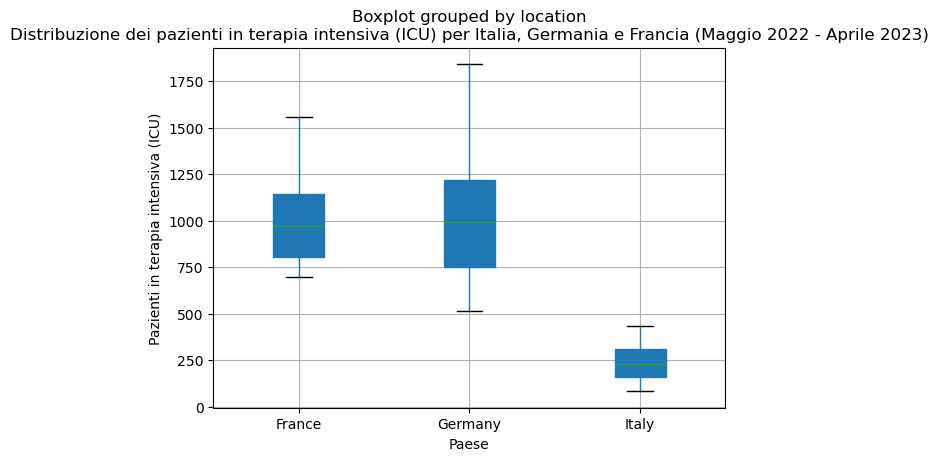

In [18]:
#Filtrare il dataset per includere solo i dati relativi a Italia, Germania e Francia nel periodo specificato
df_filtro = df[(df['location'].isin(['Italy', 'Germany', 'France'])) & 
                 (df['date'] >= '2022-05-01') & 
                 (df['date'] <= '2023-04-30')]
df_filtro.sample(10)

# Creare un boxplot per visualizzare la distribuzione del numero di pazienti in terapia intensiva (ICU) per ciascun paese
boxplot = df_filtro.boxplot(column='icu_patients', by='location', patch_artist=True)
plt.title('Distribuzione dei pazienti in terapia intensiva (ICU) per Italia, Germania e Francia (Maggio 2022 - Aprile 2023)')
plt.xlabel('Paese')
plt.ylabel('Pazienti in terapia intensiva (ICU)')
plt.grid(True)

In [19]:
# Possiamo notare che la Germania è il paese che ha avuto più pazienti in terapia intensiva, subito dopo la Francia
# Da questo grafico possiamo dedurre anche che forse in Italia non c'erano abbastanza posti in ospedale per distrivuire i pazienti in ICU 
# in quanto sono molto poco rispetto agli altri paese.

In [20]:
# Riguardo le nazioni di Italia, Germania, Francia e Spagna nel 2023, mostrare la somma dei pazienti ospitalizzati per ognuna 
# se ci sono dati nulli, suggerire se può essere possibile gestirli tramite sostituzione o meno.

In [21]:
#Filtrare il dataset per includere solo i dati relativi a Italia, Germania, Francia e Spagna nel 2023
df_2023 = df[(df['location'].isin(['Italy', 'Germany', 'France', 'Spain'])) & (df['date'].dt.year == 2023)]

# Calcolare la somma dei pazienti ospitalizzati per ciascun paese
somma_ospitalizzati = df_2023.groupby('location')['hosp_patients'].sum()
# Visualizzare la somma dei pazienti ospitalizzati per ciascun paese
print("Somma dei pazienti ospitalizzati nel 2023 per ogni nazione:")
somma_ospitalizzati = somma_ospitalizzati.apply(lambda x: '{:,.0f}'.format(x))
print(somma_ospitalizzati)

Somma dei pazienti ospitalizzati nel 2023 per ogni nazione:
location
France     1,382,574
Germany            0
Italy      1,175,272
Spain        354,602
Name: hosp_patients, dtype: object


In [22]:
# in questo caso la somma degli ospitalizzati in germania è = a 0, la cosa più giusta da fare secondo me è sostituire il dato 
# con la somma dei pazienti che sono in terapia intensiva della nazione Germania dello stesso range di tempo 



In [23]:

# Filtrare il dataset per includere solo i dati relativi alla Germania nel 2023
df_germania_2023 = df[(df['location'] == 'Germany') & (df['date'].dt.year == 2023)]

# Calcolare la somma dei pazienti in terapia intensiva per la Germania nel 2023
somma_icu_germania_2023 = df_germania_2023['icu_patients'].sum()

# Stampa la somma dei pazienti in terapia intensiva per la Germania nel 2023
somma_icu_germania_2023 = "{:,.0f}".format(somma_icu_germania_2023)
print("Somma dei pazienti in terapia intensiva per la Germania nel 2023:", somma_icu_germania_2023)


Somma dei pazienti in terapia intensiva per la Germania nel 2023: 124,107
